1. Create a classification model using SVM for the voice.csv data. 

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

In [2]:
data = pd.read_csv("voice.csv")

In [3]:
data.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [4]:
# Check data per class
print(data['meanfreq'].value_counts())
print('\n')

# Check general information
print(data.info())
print('\n')

# Check Descriptive Statistic Information
print(data.describe())

0.212190    2
0.213732    2
0.059781    1
0.188687    1
0.191174    1
           ..
0.192408    1
0.192558    1
0.194565    1
0.196195    1
0.165509    1
Name: meanfreq, Length: 3166, dtype: int64


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   meanfreq  3168 non-null   float64
 1   sd        3168 non-null   float64
 2   median    3168 non-null   float64
 3   Q25       3168 non-null   float64
 4   Q75       3168 non-null   float64
 5   IQR       3168 non-null   float64
 6   skew      3168 non-null   float64
 7   kurt      3168 non-null   float64
 8   sp.ent    3168 non-null   float64
 9   sfm       3168 non-null   float64
 10  mode      3168 non-null   float64
 11  centroid  3168 non-null   float64
 12  meanfun   3168 non-null   float64
 13  minfun    3168 non-null   float64
 14  maxfun    3168 non-null   float64
 15  meandom   3168 non-null   

In [6]:
# Define categorical label
label = {
    'male' : 'Kelas A',
    'female' : 'Kelas B'
}

# Duplicate DataFrame
data_label = data.copy()

# Map new label to encoded label
data_label['label'] = data_label['label'].map(label)

# Check
data_label.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,Kelas A
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,Kelas A
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,Kelas A
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,Kelas A
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,Kelas A


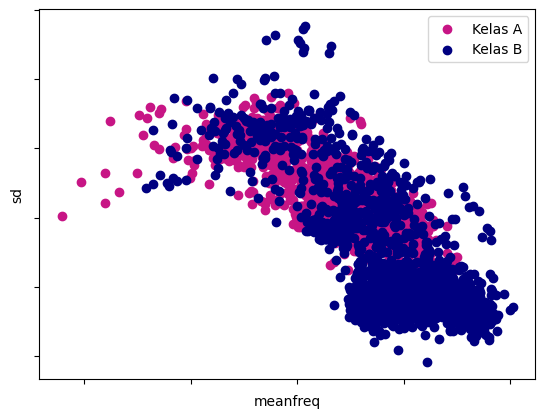

In [8]:
import matplotlib.pyplot as plt

# Define the color for each class
colors = {
    'class_a': 'MediumVioletRed',
    'class_b': 'Navy'
}

# Group by Label
gb = data_label.groupby(['label'])
class_a = gb.get_group('Kelas A')
class_b = gb.get_group('Kelas B')

# Plot
plt.scatter(x=class_a['meanfreq'], y=class_a['sd'], c=colors['class_a'])
plt.scatter(x=class_b['meanfreq'], y=class_b['sd'], c=colors['class_b'])
plt.xlabel('meanfreq')
plt.ylabel('sd')
plt.legend(['Kelas A', 'Kelas B'])
plt.gca().axes.xaxis.set_ticklabels([])
plt.gca().axes.yaxis.set_ticklabels([])
plt.show()

2. Create a Multinomial Naive Bayes classification model with the following conditions:
    a. Use the spam.csv data.
    b. Utilize CountVectorizer with stop words enabled.
    c. Evaluate the results.

In [21]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [15]:
# Load the dataset (assuming 'spam.csv' contains 'text' and 'label' columns)
df = pd.read_csv('spam.csv', encoding='latin-1')

In [16]:
# Check
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [17]:
# Drop last 3 columns
df = df.drop(df.iloc[:,2:], axis=1)

# Check
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [18]:
# Rename "v1" and "v2"
new_cols = {
    'v1': 'Labels',
    'v2': 'SMS'
}

# Do renaming columns
df = df.rename(columns=new_cols)

# Check
df.head()

,Labels,SMS
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [26]:
# Data Preprocessing
X = df['SMS']  # Features
y = df['Labels']  # Target variable

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert the set of stop words into a list
stop_words = list(stopwords.words('english'))

# Create CountVectorizer with stop words enabled
vectorizer = CountVectorizer(stop_words=stop_words)

# Fit and transform the training data
X_train_transformed = vectorizer.fit_transform(X_train)

# Transform the testing data
X_test_transformed = vectorizer.transform(X_test)

# Create a Multinomial Naive Bayes classifier
classifier = MultinomialNB()

# Train the classifier on the training data
classifier.fit(X_train_transformed, y_train)

# Make predictions on the test data
y_pred = classifier.predict(X_test_transformed)

# Model Evaluation
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {accuracy * 100:.2f}%")

Confusion Matrix:
[[959   6]
 [ 14 136]]

Classification Report:
              precision    recall  f1-score   support

         ham       0.99      0.99      0.99       965
        spam       0.96      0.91      0.93       150

    accuracy                           0.98      1115
   macro avg       0.97      0.95      0.96      1115
weighted avg       0.98      0.98      0.98      1115


Accuracy: 98.21%


3. Create another Multinomial Naive Bayes classification model with the following conditions:
    a.Use the spam.csv data.
    b.Employ TF-IDF features with stop words enabled.
    c.Evaluate the results and compare them with the results from Task #2.
    d.Provide a conclusion on which feature extraction method is best for the spam.csv dataset.

In [27]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from nltk.corpus import stopwords

In [29]:
df = pd.read_csv('spam.csv', encoding='latin-1')

In [30]:
# Drop last 3 columns
df = df.drop(df.iloc[:,2:], axis=1)

# Check
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [31]:
# Rename "v1" and "v2"
new_cols = {
    'v1': 'Labels',
    'v2': 'SMS'
}

# Do renaming columns
df = df.rename(columns=new_cols)

# Check
df.head()

,Labels,SMS
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [32]:
# Data Preprocessing
X = df['SMS']  # Features
y = df['Labels']  # Target variable

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert the set of stop words into a list
stop_words = list(stopwords.words('english'))

# Create TF-IDF Vectorizer with stop words enabled
tfidf_vectorizer = TfidfVectorizer(stop_words=stop_words)

# Fit and transform the training data
X_train_transformed = tfidf_vectorizer.fit_transform(X_train)

# Transform the testing data
X_test_transformed = tfidf_vectorizer.transform(X_test)

# Create a Multinomial Naive Bayes classifier
classifier = MultinomialNB()

# Train the classifier on the training data
classifier.fit(X_train_transformed, y_train)

# Make predictions on the test data
y_pred = classifier.predict(X_test_transformed)

# Model Evaluation for TF-IDF Features
print("TF-IDF Features:")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {accuracy * 100:.2f}%")

TF-IDF Features:
Confusion Matrix:
[[965   0]
 [ 33 117]]

Classification Report:
              precision    recall  f1-score   support

         ham       0.97      1.00      0.98       965
        spam       1.00      0.78      0.88       150

    accuracy                           0.97      1115
   macro avg       0.98      0.89      0.93      1115
weighted avg       0.97      0.97      0.97      1115


Accuracy: 97.04%
